### Naive_bayes Email_spam_filter

### Import data set

In [26]:
df=pd.read_csv('Email.csv')

In [27]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Exploration

In [28]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

### Convert Category to label encoding

In [29]:
# Import label encoder
from sklearn import preprocessing

In [30]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [31]:
# Encode labels in column 'species'.
df['Spam']= label_encoder.fit_transform(df['Category'])
  
df['Spam'].unique()

array([0, 1])

In [32]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Split the Data set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Spam)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Train the data set

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

### Predicat the Model

In [45]:
emails = [
    'The explosive trajectory of monkeypox to nearly 90 countries since the current outbreak was detected in the United Kingdom in mid-May has caught many governments off-guard, and created confusion about how monkeypox spreads from person to person.',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

### Check the accuracey

In [46]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9798994974874372

### Sklearn Pipeline

In [47]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [48]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [49]:
clf.score(X_test,y_test)

0.9798994974874372

In [50]:

clf.predict(emails)

array([0, 1])

In [52]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

### Classfication Report

In [53]:
from sklearn.metrics import classification_report

target_names = ["Spam","ham"]
print(classification_report(y_test, yhat, target_names=target_names))


              precision    recall  f1-score   support

        Spam       0.98      0.99      0.99      1194
         ham       0.95      0.90      0.93       199

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [54]:
from sklearn.metrics import confusion_matrix
# y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
cm

array([[1185,    9],
       [  19,  180]], dtype=int64)

### Confusion Matrix

Text(42.0, 0.5, 'Truth')

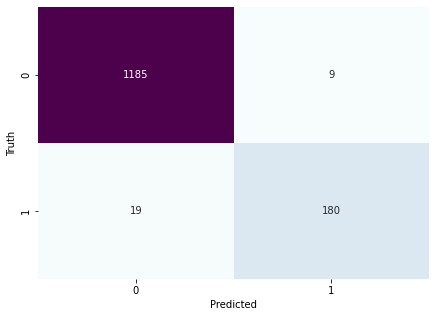

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True,fmt='d',cbar=False,cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Truth')